In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

from glob import glob
import pickle
import os

import numpy as np
import cv2

from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [2]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    if orient == 'x':
        sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_img = np.zeros_like(scaled_sobel)
    binary_img[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_img

def mag_thresh(image, sobel_kernel=3, thresh=(0, 255)):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobel = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    dir_binary = np.zeros_like(abs_sobel)
    dir_binary[(abs_sobel >= thresh[0]) & (abs_sobel <= thresh[1])] = 1
    return dir_binary

In [3]:
# test_image = cv2.imread("frames/frame1040.jpg")
test_image = cv2.imread("test_images/test1.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

hls = cv2.cvtColor(test_image, cv2.COLOR_RGB2HLS)
hsv = cv2.cvtColor(test_image, cv2.COLOR_RGB2HSV)
lab = cv2.cvtColor(test_image, cv2.COLOR_RGB2LAB)
gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
yuv = cv2.cvtColor(test_image, cv2.COLOR_RGB2YUV)

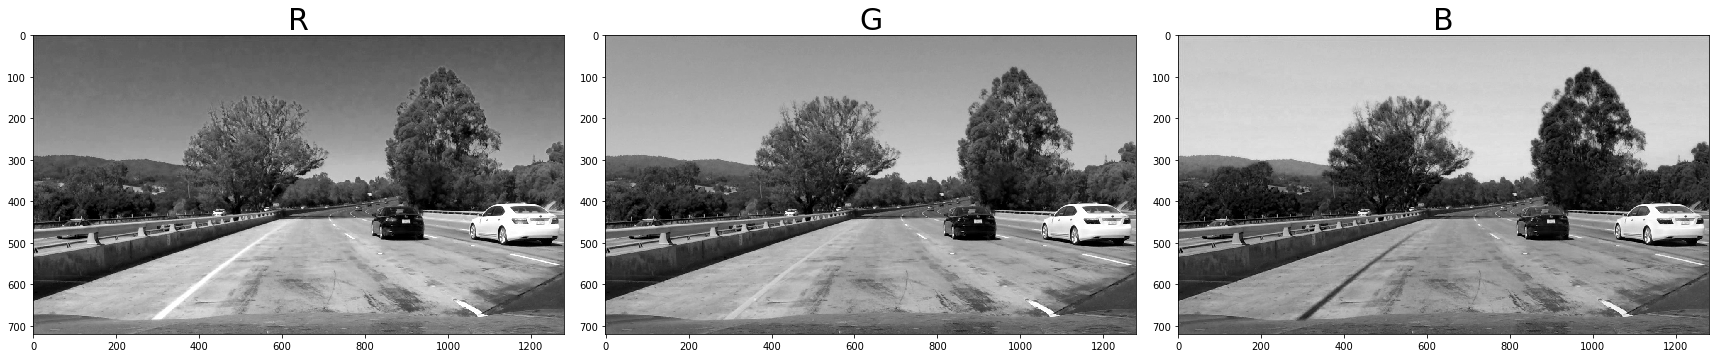

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image[:, :, 0], cmap='gray')
ax1.set_title('R', fontsize=30)
ax2.imshow(test_image[:, :, 1], cmap='gray')
ax2.set_title('G', fontsize=30)
ax3.imshow(test_image[:, :, 2], cmap='gray')
ax3.set_title('B', fontsize=30)

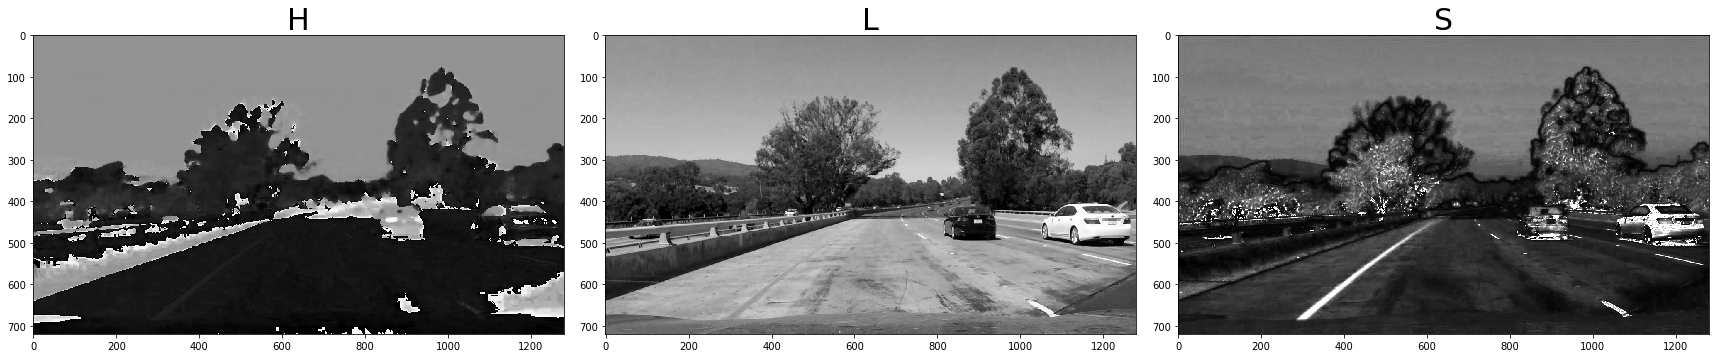

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(hls[:, :, 0], cmap='gray')
ax1.set_title('H', fontsize=30)
ax2.imshow(hls[:, :, 1], cmap='gray')
ax2.set_title('L', fontsize=30)
ax3.imshow(hls[:, :, 2], cmap='gray')
ax3.set_title('S', fontsize=30)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

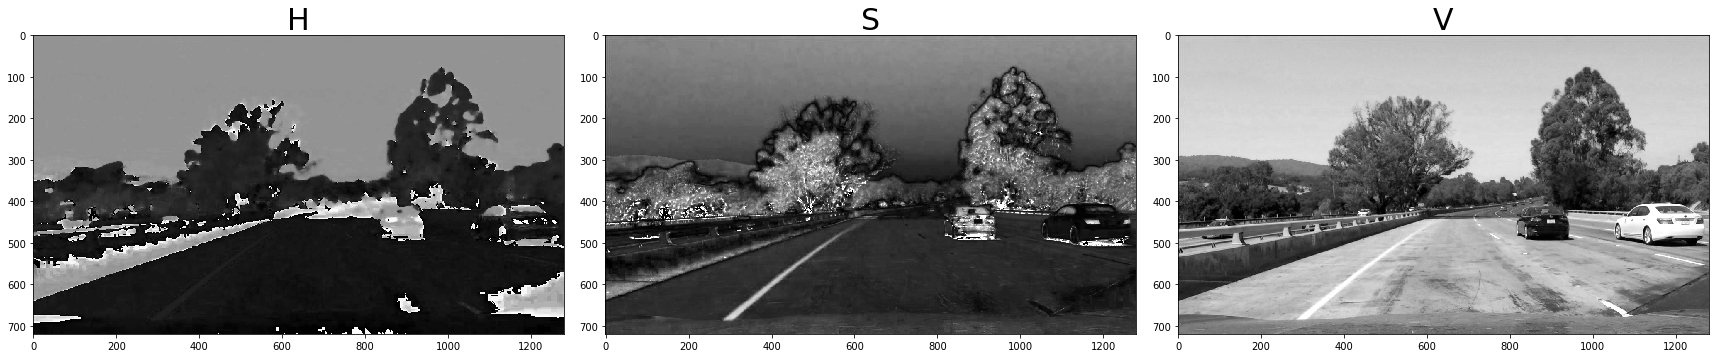

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(hsv[:, :, 0], cmap='gray')
ax1.set_title('H', fontsize=30)
ax2.imshow(hsv[:, :, 1], cmap='gray')
ax2.set_title('S', fontsize=30)
ax3.imshow(hsv[:, :, 2], cmap='gray')
ax3.set_title('V', fontsize=30)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

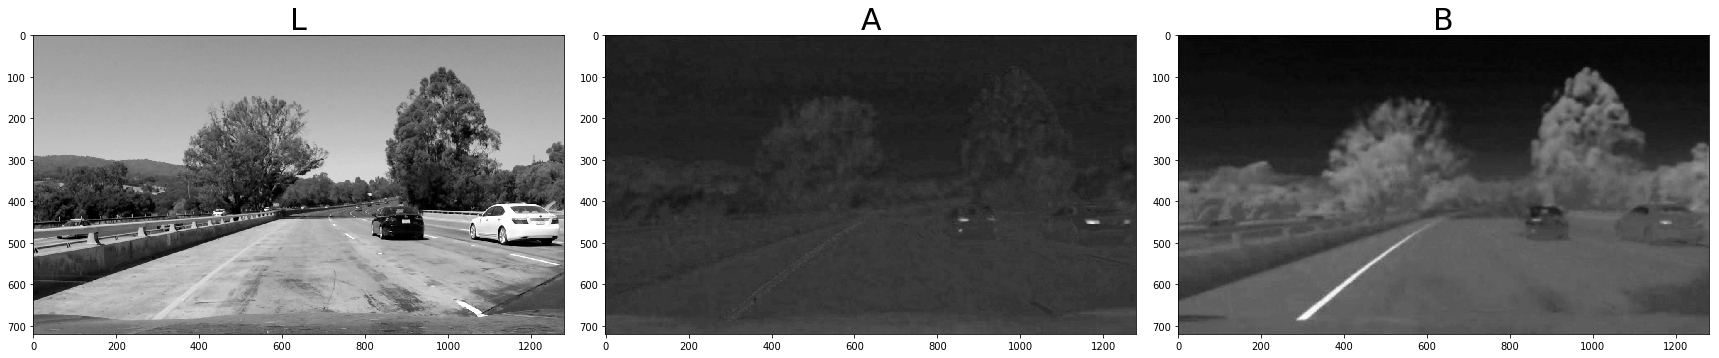

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(lab[:, :, 0], cmap='gray')
ax1.set_title('L', fontsize=30)
ax2.imshow(lab[:, :, 1], cmap='gray')
ax2.set_title('A', fontsize=30)
ax3.imshow(lab[:, :, 2], cmap='gray')
ax3.set_title('B', fontsize=30)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

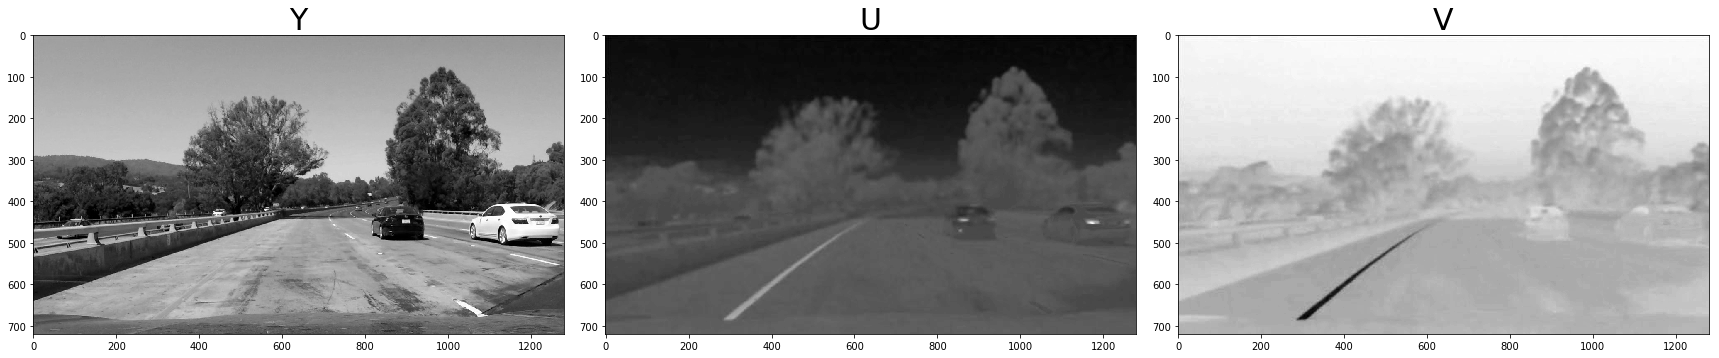

In [8]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(yuv[:, :, 0], cmap='gray')
ax1.set_title('Y', fontsize=30)
ax2.imshow(yuv[:, :, 1], cmap='gray')
ax2.set_title('U', fontsize=30)
ax3.imshow(yuv[:, :, 2], cmap='gray')
ax3.set_title('V', fontsize=30)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

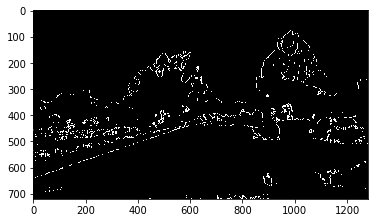

In [9]:
h = 255 - hls[:, :, 0]
sobel_h = abs_sobel_thresh(h, orient='x', sobel_kernel=3, thresh=(30, 255))
plt.imshow(sobel_h, cmap='gray')

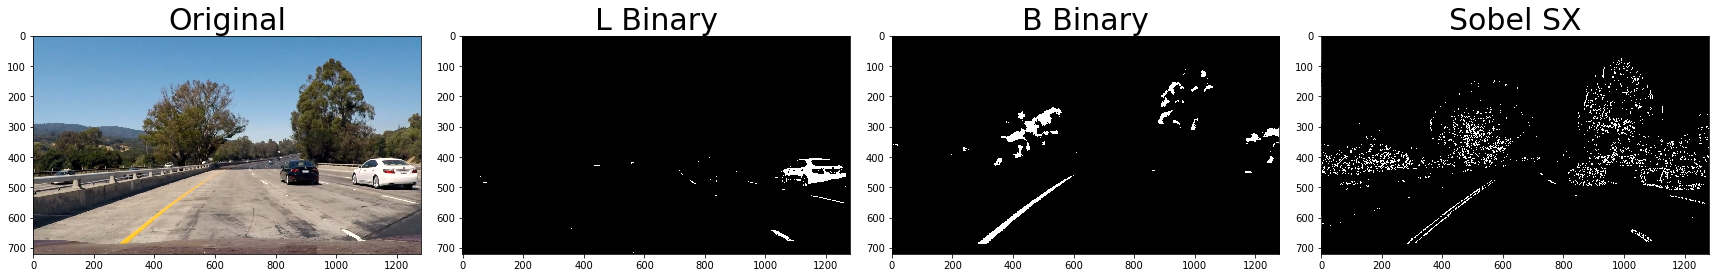

In [10]:
S = hls[:, :, 2]
# s_binary = np.zeros_like(S)
# s_binary[(S >= 170) & (S <= 255)] = 1
sobel_s = abs_sobel_thresh(S, orient='x', sobel_kernel=3, thresh=(30, 100))

B = lab[:, :, 2]
b_binary = np.zeros_like(B)
b_binary[(B >= 150) & (B <= 255)] = 1

R = test_image[:, :, 0]
r_binary = np.zeros_like(R)
r_binary[(R > 200) & (R <= 255)] = 1
# scaled_r = R & r_binary
# sobel_r = abs_sobel_thresh(scaled_r, orient='x', sobel_kernel=3, thresh=(30, 100))
h = 255 - hls[:, :, 0]
sobel_h = abs_sobel_thresh(h, orient='x', sobel_kernel=3, thresh=(30, 255))

L = lab[:, : ,0]
l_binary = np.zeros_like(L)
l_binary[(L > 225) & (L <= 255)] = 1


f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original', fontsize=30)
ax2.imshow(l_binary, cmap='gray')
ax2.set_title('L Binary', fontsize=30)
ax3.imshow(b_binary, cmap='gray')
ax3.set_title('B Binary', fontsize=30)
ax4.imshow(sobel_s, cmap='gray')
ax4.set_title('Sobel SX', fontsize=30)

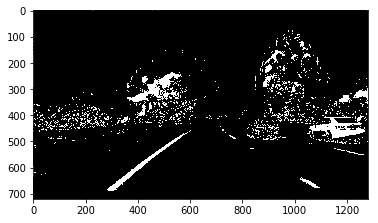

In [11]:
combined = l_binary | b_binary | sobel_s
plt.imshow(combined, cmap='gray')

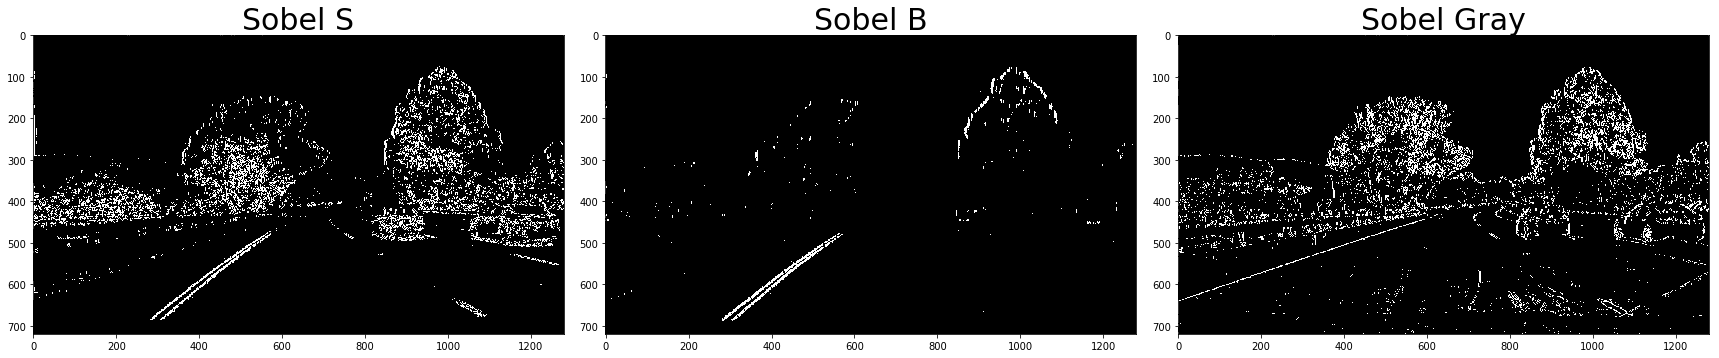

In [12]:
sobel_s = abs_sobel_thresh(hls[:,:,2], orient='x', sobel_kernel=3, thresh=(20, 100))
sobel_b = abs_sobel_thresh(lab[:,:,2], orient='x', sobel_kernel=3, thresh=(50, 200))
sobel_gray = abs_sobel_thresh(gray, orient='x', sobel_kernel=3, thresh=(20, 100))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(sobel_s, cmap='gray')
ax1.set_title('Sobel S', fontsize=30)
ax2.imshow(sobel_b, cmap='gray')
ax2.set_title('Sobel B', fontsize=30)
ax3.imshow(sobel_gray, cmap='gray')
ax3.set_title('Sobel Gray', fontsize=30)

In [13]:
combined = s_binary | b_binary | (sobel_gray ^ r_binary)
plt.imshow(combined, cmap='gray')

NameError: name 's_binary' is not defined

In [14]:
src = np.float32([[200, 720], [595, 450], [685, 450], [1120, 720]])
dst = np.float32([[300, 720], [300, 0], [1000, 0], [1000, 720]])

M = cv2.getPerspectiveTransform(src, dst)

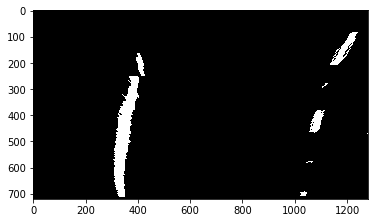

In [15]:
warped = cv2.warpPerspective(combined, M, (1280, 720), flags=cv2.INTER_LINEAR)
plt.imshow(warped, cmap='gray')

In [16]:
def color_threshold(image):
    S = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:, :, 2]
    # s_binary = np.zeros_like(S)
    # s_binary[(S >= 170) & (S <= 255)] = 1
    sobel_s = abs_sobel_thresh(S, orient='x', sobel_kernel=3, thresh=(30, 100))

    B = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)[:, :, 2]
    b_binary = np.zeros_like(B)
    b_binary[(B >= 150) & (B <= 255)] = 1
    
    R = image[:, :, 0]
    r_binary = np.zeros_like(R)
    r_binary[(R > 200) & (R <= 255)] = 1

    L = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)[:, :, 0]
    l_binary = np.zeros_like(L)
    l_binary[(L > 225) & (L <= 255)] = 1
    
    # return l_binary | b_binary | r_binary
    return l_binary | b_binary | sobel_s

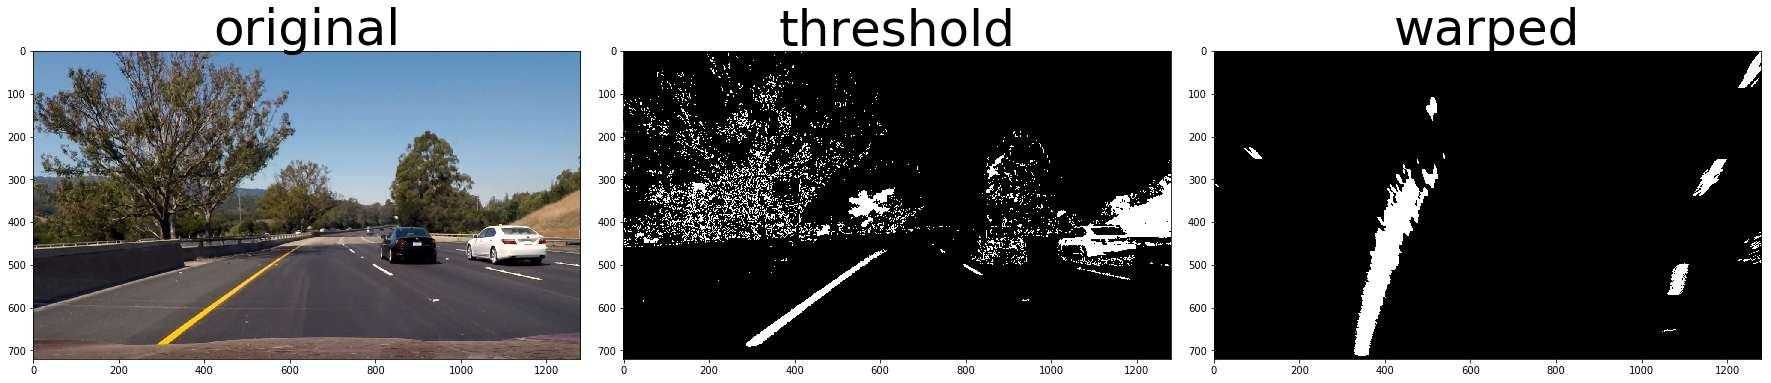

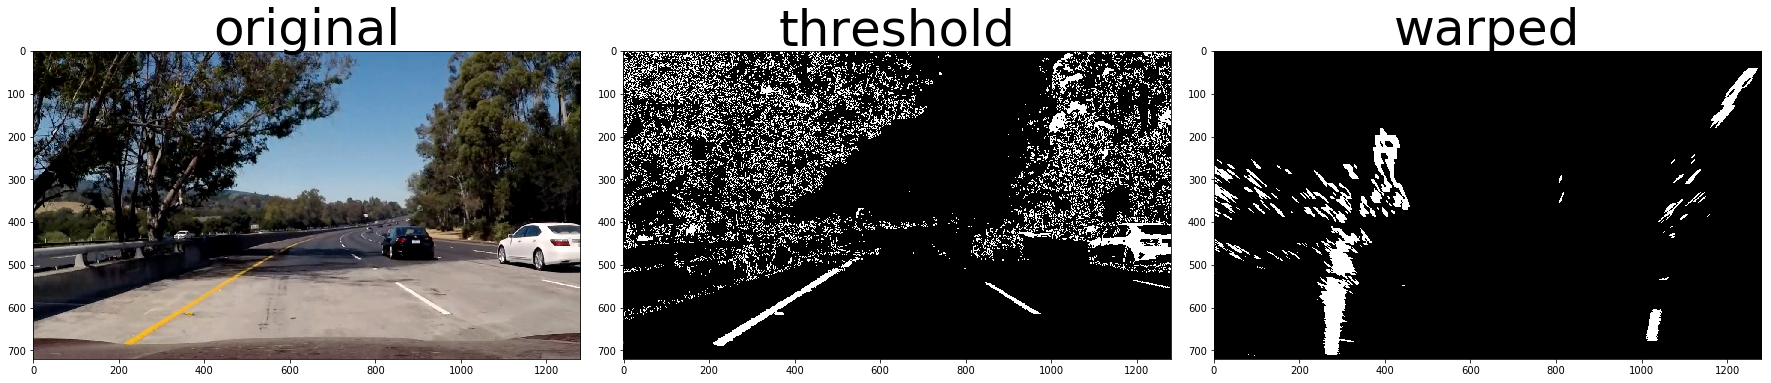

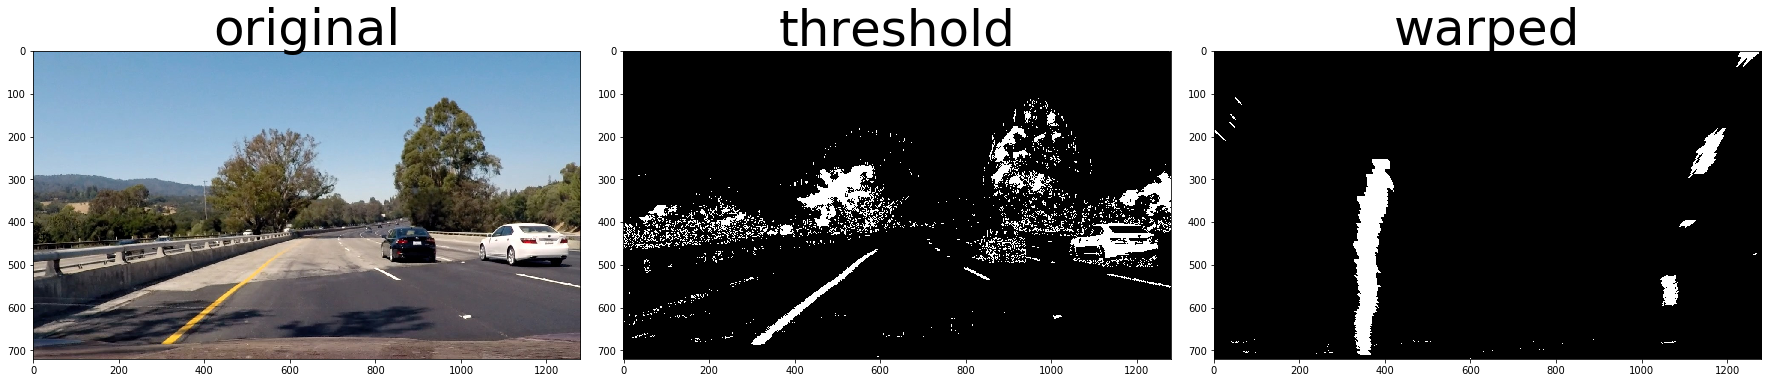

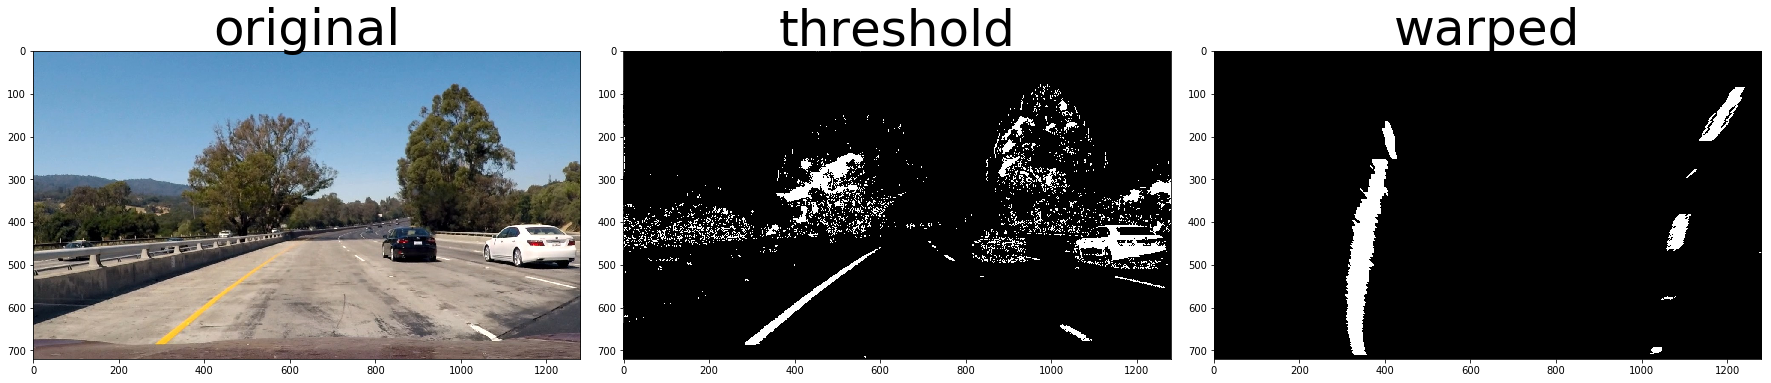

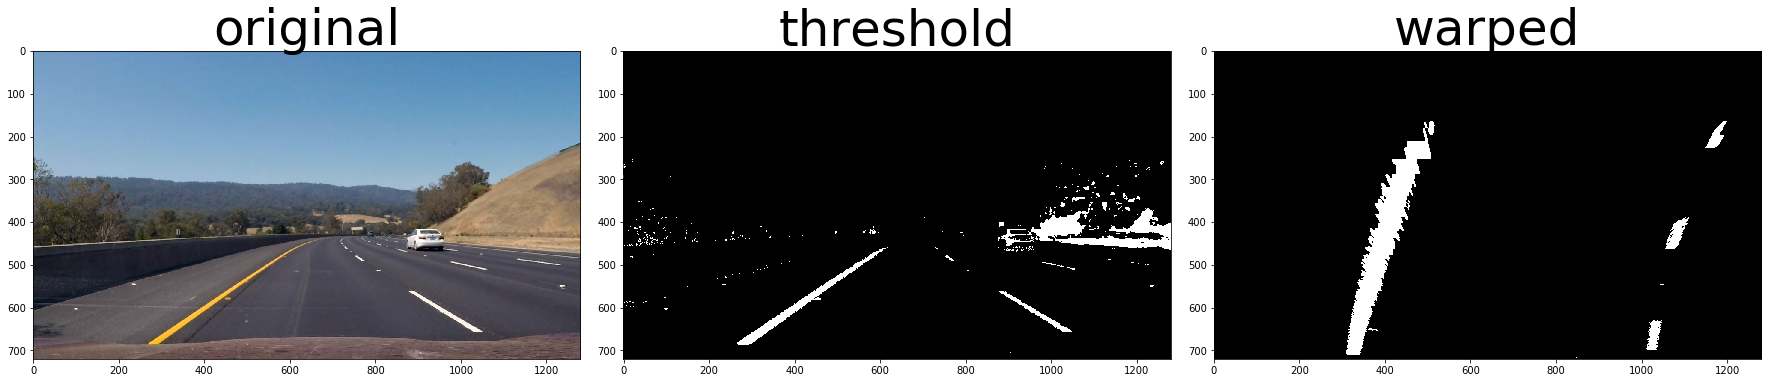

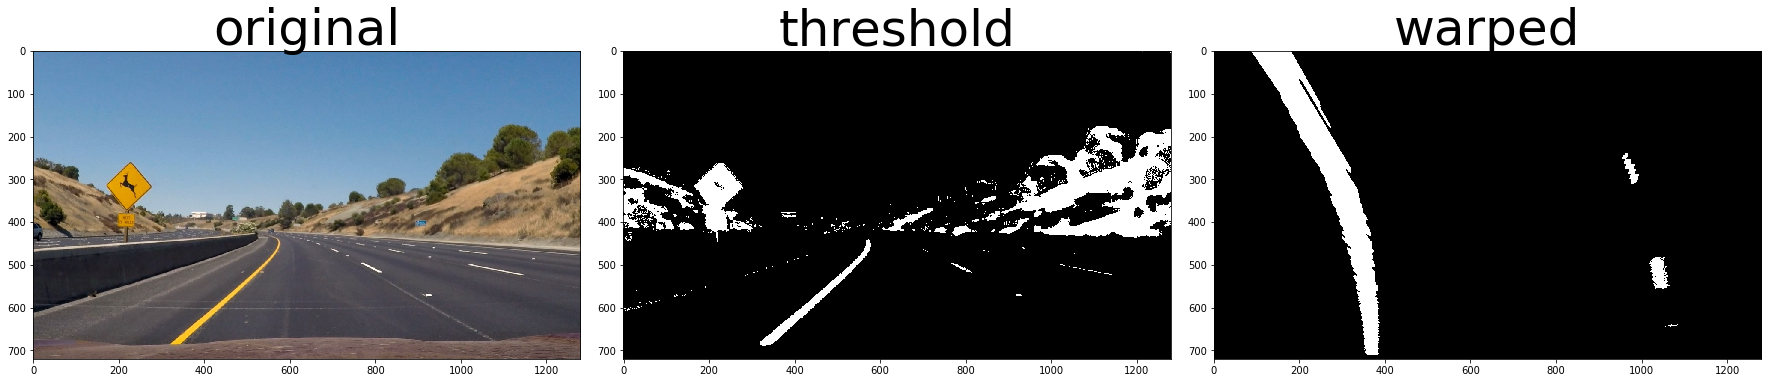

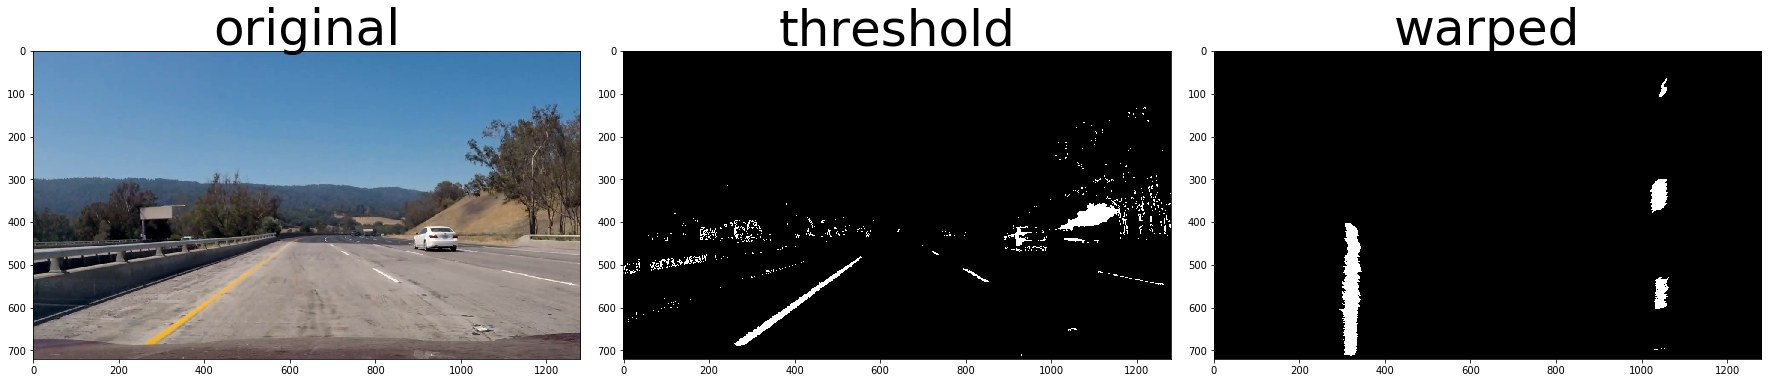

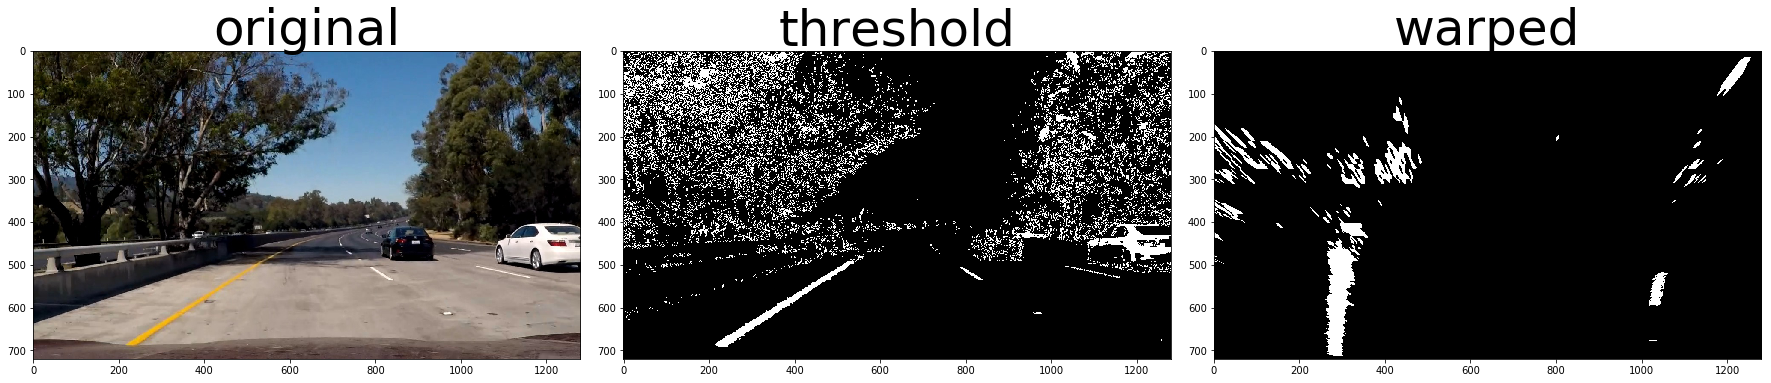

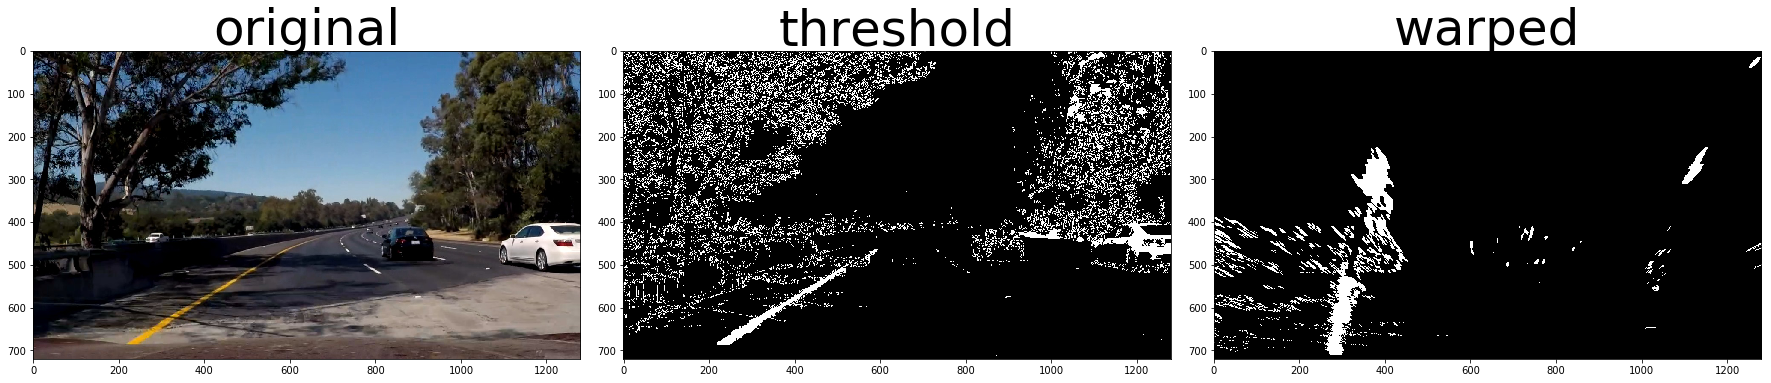

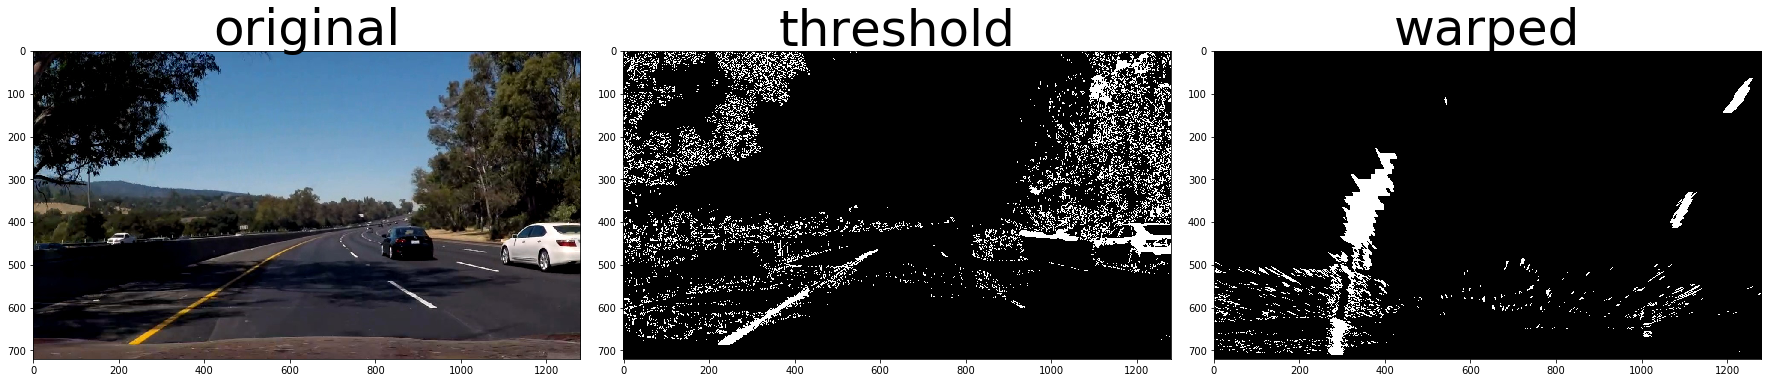

In [17]:
test_images = glob(os.path.join('test_images', 'test*.jpg'))
test_images.append("frames/frame577.jpg")
test_images.append("frames/frame1026.jpg")
test_images.append("frames/frame1035.jpg")
test_images.append("frames/frame1040.jpg")

for test_image in test_images:
    image = cv2.imread(test_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    combined = color_threshold(image)
    warped = cv2.warpPerspective(combined, M, (1280, 720), flags=cv2.INTER_LINEAR)
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('original', fontsize=50)
    ax2.imshow(combined, cmap='gray')
    ax2.set_title('threshold', fontsize=50)
    ax3.imshow(warped, cmap='gray')
    ax3.set_title('warped', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)